# Kamień milowy 2(Inżynieria cech, wstępne modelowanie)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
congressional_voting_df = pd.read_csv("congressional_voting_dataset.csv")

In [4]:
map = {"y": 1, "n" : 0, "?": np.nan, "democrat" : 1, "republican" : 0}

columns = congressional_voting_df.columns.to_list()
for column in columns:
    congressional_voting_df[column] = congressional_voting_df[column].map(map)

congressional_voting_df.head(5)

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,political_party
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,0.0
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0


In [13]:
test_data = congressional_voting_df.sample(frac=0.3)
train_data = congressional_voting_df.drop(test_data.index)

In [14]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(train_data)

train_data = pd.DataFrame(imp.transform(train_data), columns = train_data.columns.to_list())
test_data = pd.DataFrame(imp.transform(test_data), columns = test_data.columns.to_list())

In [21]:
train_data

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,political_party
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
301,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
302,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
303,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


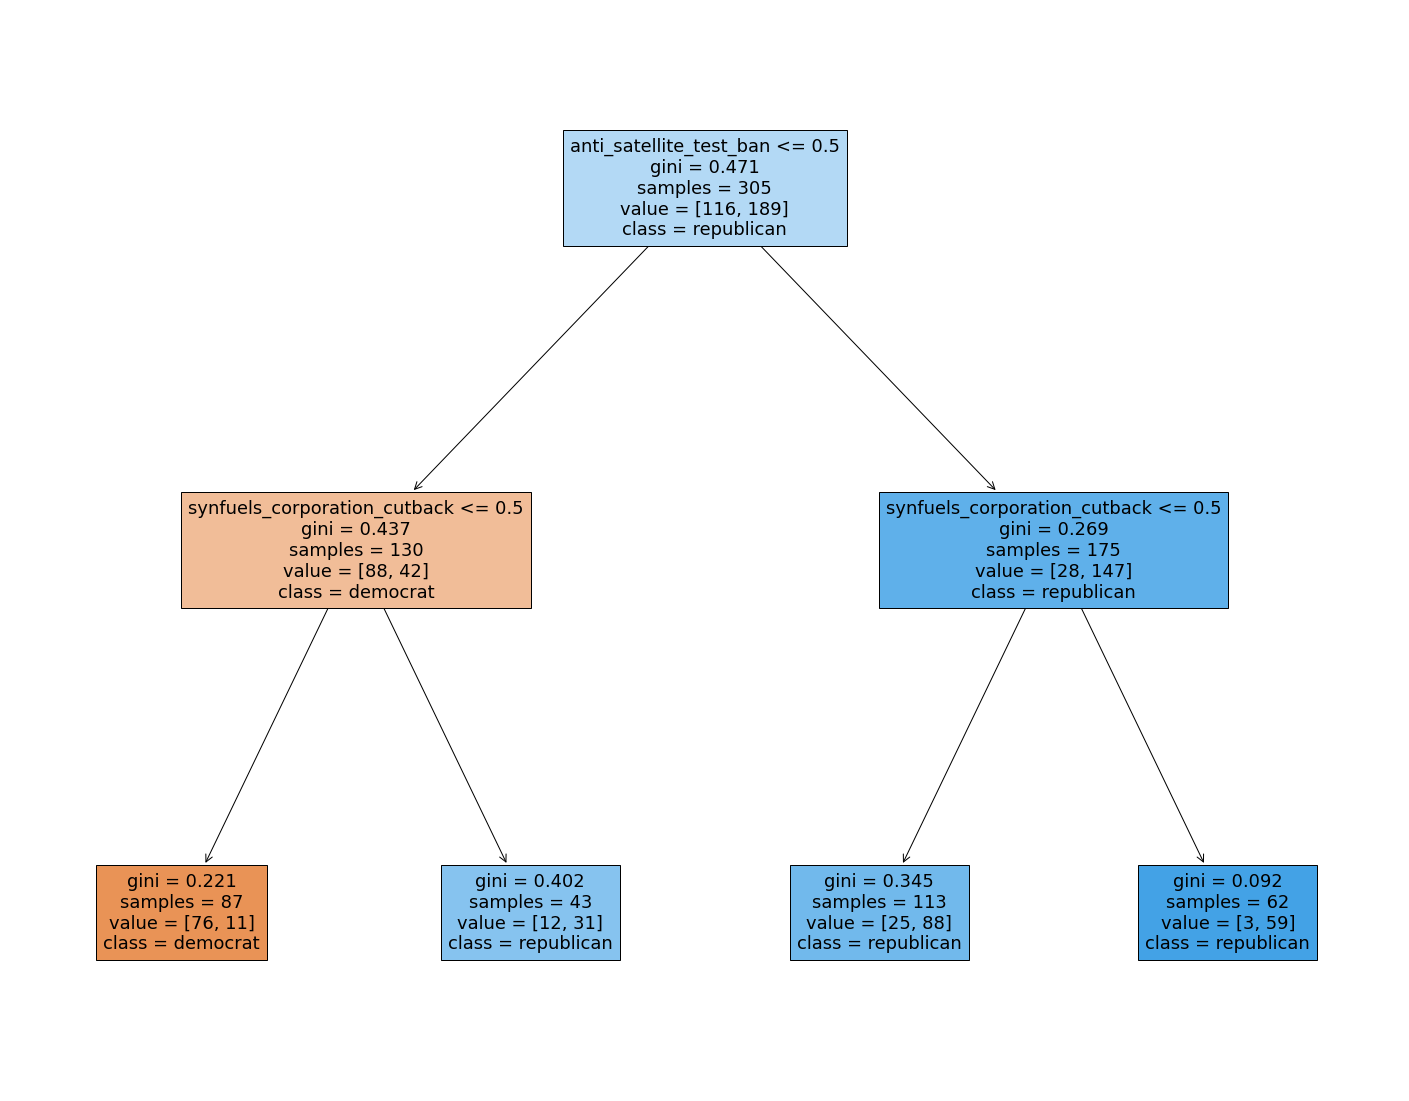

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=1234)
X = train_data[["anti_satellite_test_ban", "synfuels_corporation_cutback"]]
model = clf.fit(X, train_data["political_party"])

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns.to_list(),  
                   class_names=["democrat", "republican"],
                   filled=True)

In [27]:
X = test_data[["anti_satellite_test_ban", "synfuels_corporation_cutback"]]
clf.score(X, test_data["political_party"])

0.8

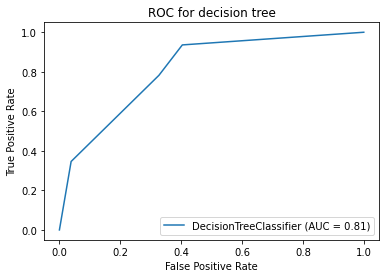

In [31]:
from sklearn import metrics

metrics.plot_roc_curve(clf, X, test_data["political_party"])
plt.title("ROC for decision tree")
plt.show()